<a href="https://colab.research.google.com/github/spegas/Dacon/blob/main/make_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-datareader

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=54354ae3ae61c06297e1f5c08e0df0e0d8579eabca5c6abbc7eb9675003fb336
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [13]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
import wget

from zipfile import ZipFile
from os.path import basename

In [28]:
if not os.path.isdir("base"):
  print("base 디렉토리 생성")
  os.makedirs("base")

if not os.path.isdir("result"):
  print("result 디렉토리 생성")
  os.makedirs("result")

if not os.path.isdir("price"):
  print("price 디렉토리 생성")
  os.makedirs("price")

result 디렉토리 생성


In [7]:
stock_list_file_url = "https://raw.githubusercontent.com/spegas/Dacon/main/stock_list.csv"
if os.path.exists('base/stock_list.csv'):
  os.remove('base/stock_list.csv')
  print('이전에 저장된 주식 종목 리스트 파일을 삭제 합니다.')
wget.download(stock_list_file_url, 'base/stock_list.csv')
print('주식 종목 리스트 파일 다운로드 완료')

주식 종목 리스트 파일 다운로드 완료


In [16]:
stock_list_name = 'base/stock_list.csv'
pd_stock_list = pd.read_csv(stock_list_name)
pd_stock_list['종목코드'] = pd_stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
pd_stock_list.head(10)

,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
5,삼성전자우,005935,KOSPI
6,LG화학,051910,KOSPI
7,삼성SDI,006400,KOSPI
8,현대차,005380,KOSPI
9,셀트리온,068270,KOSPI


In [17]:
price_file_url = "https://raw.githubusercontent.com/spegas/Dacon/main/price.zip"
if os.path.exists('price.zip'):
  os.remove('price.zip')
  print('이전에 저장된 주식 가격 파일을 삭제 합니다.')
wget.download(price_file_url, 'price.zip')
print('주식 가격 파일 다운로드 완료')

이전에 저장된 주식 가격 파일을 삭제 합니다.
주식 가격 파일 다운로드 완료


In [18]:
ZipFile('price.zip').extractall()

In [30]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import activations
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

import matplotlib.pyplot as plt

In [32]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 62ms/step - loss: 4069138944.0000 - val_loss: 4057434880.0000
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 4209638144.0000 - val_loss: 4677316096.0000
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 4495775744.0000 - val_loss: 4677220352.0000
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 4495678976.0000 - val_loss: 4677118464.0000
Epoch 5/100
7/7 [==============================] - 0s 24ms/step - loss: 4495579648.0000 - val_loss: 4677016064.0000
Epoch 6/100
7/7 [==============================] - 0s 24ms/step - loss: 4495468544.0000 - val_loss: 4676876800.0000
Epoch 7/100
7/7 [==============================] - 0s 24ms/step - loss: 4495315456.0000 - val_loss: 4676707840.0000
Epoch 8/100
7/7 [==============================] - 0s 27ms/step - loss: 4495145472.0000 - val_loss: 4676531200.0000
Epoch 9/100
7/7 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/034730_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 60ms/step - loss: 711586873344.0000 - val_loss: 706509078528.0000
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 711277084672.0000 - val_loss: 706506522624.0000
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 711274397696.0000 - val_loss: 706504032256.0000
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 711271972864.0000 - val_loss: 706501410816.0000
Epoch 5/100
7/7 [==============================] - 0s 29ms/step - loss: 711269285888.0000 - val_loss: 706498920448.0000
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 711266664448.0000 - val_loss: 706496233472.0000
Epoch 7/100
7/7 [==============================] - 0s 26ms/step - loss: 711264043008.0000 - val_loss: 706493546496.0000
Epoch 8/100
7/7 [==============================] - 0s 25ms/step - loss: 711

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/036570_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 59ms/step - loss: 334940256.0000 - val_loss: 298660352.0000
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 334921216.0000 - val_loss: 298642304.0000
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 334901696.0000 - val_loss: 298624480.0000
Epoch 4/100
7/7 [==============================] - 0s 27ms/step - loss: 334883008.0000 - val_loss: 298606304.0000
Epoch 5/100
7/7 [==============================] - 0s 27ms/step - loss: 334863808.0000 - val_loss: 298588352.0000
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 334844800.0000 - val_loss: 298570304.0000
Epoch 7/100
7/7 [==============================] - 0s 25ms/step - loss: 334825824.0000 - val_loss: 298552160.0000
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 334806336.0000 - val_loss: 298534240.0000
Epo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/011200_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 60ms/step - loss: 3389134802518016.0000 - val_loss: 255739216.0000
Epoch 2/100
7/7 [==============================] - 0s 26ms/step - loss: 299100064.0000 - val_loss: 557100160.0000
Epoch 3/100
7/7 [==============================] - 0s 27ms/step - loss: 580602560.0000 - val_loss: 480850464.0000
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 493712288.0000 - val_loss: 480852032.0000
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 493713408.0000 - val_loss: 480852800.0000
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 493714016.0000 - val_loss: 480853184.0000
Epoch 7/100
7/7 [==============================] - 0s 27ms/step - loss: 493714368.0000 - val_loss: 480853408.0000
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 493714464.0000 - val_loss: 480853472.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/015760_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 62ms/step - loss: 4365489664.0000 - val_loss: 4165548544.0000
Epoch 2/100
7/7 [==============================] - 0s 26ms/step - loss: 4331993088.0000 - val_loss: 4165460736.0000
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 4331903488.0000 - val_loss: 4165373184.0000
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 4331813888.0000 - val_loss: 4165286144.0000
Epoch 5/100
7/7 [==============================] - 0s 25ms/step - loss: 4331723776.0000 - val_loss: 4165197824.0000
Epoch 6/100
7/7 [==============================] - 0s 24ms/step - loss: 4331634176.0000 - val_loss: 4165111040.0000
Epoch 7/100
7/7 [==============================] - 0s 28ms/step - loss: 4331545088.0000 - val_loss: 4165022976.0000
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 4331453952.0000 - val_loss: 416

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/032830_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 64ms/step - loss: 6832924160.0000 - val_loss: 417074080.0000
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 637434688.0000 - val_loss: 772839680.0000
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 288785376.0000 - val_loss: 236125376.0000
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 146742112.0000 - val_loss: 189402256.0000
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 174833184.0000 - val_loss: 367818272.0000
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 203544720.0000 - val_loss: 143938384.0000
Epoch 7/100
7/7 [==============================] - 0s 27ms/step - loss: 113394416.0000 - val_loss: 150660304.0000
Epoch 8/100
7/7 [==============================] - 0s 25ms/step - loss: 97414776.0000 - val_loss: 154245872.0000
Epo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/018260_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 61ms/step - loss: 8411440640.0000 - val_loss: 10497209344.0000
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 5881862656.0000 - val_loss: 1369102720.0000
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 1758896000.0000 - val_loss: 807135680.0000
Epoch 4/100
7/7 [==============================] - 0s 25ms/step - loss: 1185683456.0000 - val_loss: 34990784.0000
Epoch 5/100
7/7 [==============================] - 0s 25ms/step - loss: 403168608.0000 - val_loss: 43168000.0000
Epoch 6/100
7/7 [==============================] - 0s 25ms/step - loss: 221651712.0000 - val_loss: 60833452.0000
Epoch 7/100
7/7 [==============================] - 0s 26ms/step - loss: 133761904.0000 - val_loss: 69819120.0000
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 77142072.0000 - val_loss: 39802600.0000
Ep

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/009150_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 61ms/step - loss: 41423097856.0000 - val_loss: 39861800960.0000
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 41422819328.0000 - val_loss: 39861530624.0000
Epoch 3/100
7/7 [==============================] - 0s 26ms/step - loss: 41422540800.0000 - val_loss: 39861252096.0000
Epoch 4/100
7/7 [==============================] - 0s 25ms/step - loss: 41422262272.0000 - val_loss: 39860981760.0000
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 41421983744.0000 - val_loss: 39860703232.0000
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 41421705216.0000 - val_loss: 39860436992.0000
Epoch 7/100
7/7 [==============================] - 0s 26ms/step - loss: 41421422592.0000 - val_loss: 39860158464.0000
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 41421139968.0000 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/090430_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 62ms/step - loss: 1123224960.0000 - val_loss: 1163427072.0000
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 1123179264.0000 - val_loss: 1163380096.0000
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 1123133184.0000 - val_loss: 1163333504.0000
Epoch 4/100
7/7 [==============================] - 0s 27ms/step - loss: 1123087104.0000 - val_loss: 1163286912.0000
Epoch 5/100
7/7 [==============================] - 0s 25ms/step - loss: 1123041152.0000 - val_loss: 1163240192.0000
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 1122995328.0000 - val_loss: 1163193600.0000
Epoch 7/100
7/7 [==============================] - 0s 28ms/step - loss: 1122949504.0000 - val_loss: 1163146880.0000
Epoch 8/100
7/7 [==============================] - 0s 25ms/step - loss: 1122903424.0000 - val_loss: 116

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/086790_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 59ms/step - loss: 16408888320.0000 - val_loss: 16763073536.0000
Epoch 2/100
7/7 [==============================] - 0s 26ms/step - loss: 16408712192.0000 - val_loss: 16762893312.0000
Epoch 3/100
7/7 [==============================] - 0s 26ms/step - loss: 16408536064.0000 - val_loss: 16762714112.0000
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 16408361984.0000 - val_loss: 16762533888.0000
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 16408184832.0000 - val_loss: 16762354688.0000
Epoch 6/100
7/7 [==============================] - 0s 28ms/step - loss: 16408008704.0000 - val_loss: 16762173440.0000
Epoch 7/100
7/7 [==============================] - 0s 24ms/step - loss: 16407832576.0000 - val_loss: 16761993216.0000
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 16407656448.0000 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/251270_model.png
(240, 50, 7) (60, 50, 7)
(52, 50, 7) (52, 1)
Epoch 1/100
7/7 [==============================] - 2s 60ms/step - loss: 13493066752.0000 - val_loss: 13459833856.0000
Epoch 2/100
7/7 [==============================] - 0s 27ms/step - loss: 10483412992.0000 - val_loss: 13459318784.0000
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 10482945024.0000 - val_loss: 13458771968.0000
Epoch 4/100
7/7 [==============================] - 0s 28ms/step - loss: 10482469888.0000 - val_loss: 13458222080.0000
Epoch 5/100
7/7 [==============================] - 0s 25ms/step - loss: 10481987584.0000 - val_loss: 13457669120.0000
Epoch 6/100
7/7 [==============================] - 0s 25ms/step - loss: 10481506304.0000 - val_loss: 13457120256.0000
Epoch 7/100
7/7 [==============================] - 0s 25ms/step - loss: 10481027072.0000 - val_loss: 13456575488.0000
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 10480553984.0000 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


그래프 저장 파일 이름 :  result/003670_model.png
(166, 50, 7) (42, 50, 7)
(0,) (0,)
Epoch 1/100
5/5 [==============================] - 2s 82ms/step - loss: 68714172416.0000 - val_loss: 69522817024.0000
Epoch 2/100
5/5 [==============================] - 0s 27ms/step - loss: 68713910272.0000 - val_loss: 69522554880.0000
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: 68713660416.0000 - val_loss: 69522292736.0000
Epoch 4/100
5/5 [==============================] - 0s 28ms/step - loss: 68713394176.0000 - val_loss: 69522046976.0000
Epoch 5/100
5/5 [==============================] - 0s 29ms/step - loss: 68713136128.0000 - val_loss: 69521776640.0000
Epoch 6/100
5/5 [==============================] - 0s 31ms/step - loss: 68712882176.0000 - val_loss: 69521522688.0000
Epoch 7/100
5/5 [==============================] - 0s 29ms/step - loss: 68712615936.0000 - val_loss: 69521260544.0000
Epoch 8/100
5/5 [==============================] - 0s 27ms/step - loss: 68712366080.0000 - val_loss

ValueError: ignored

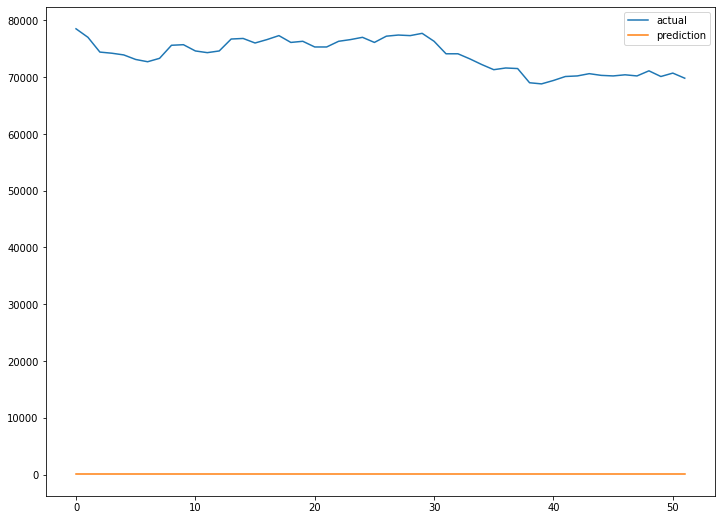

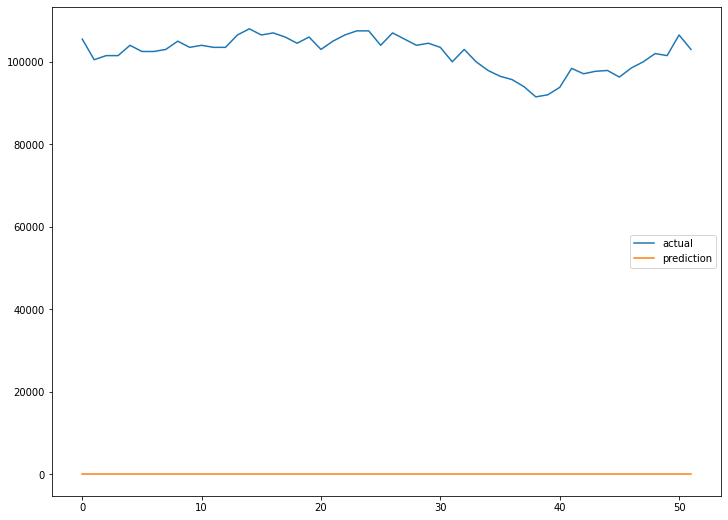

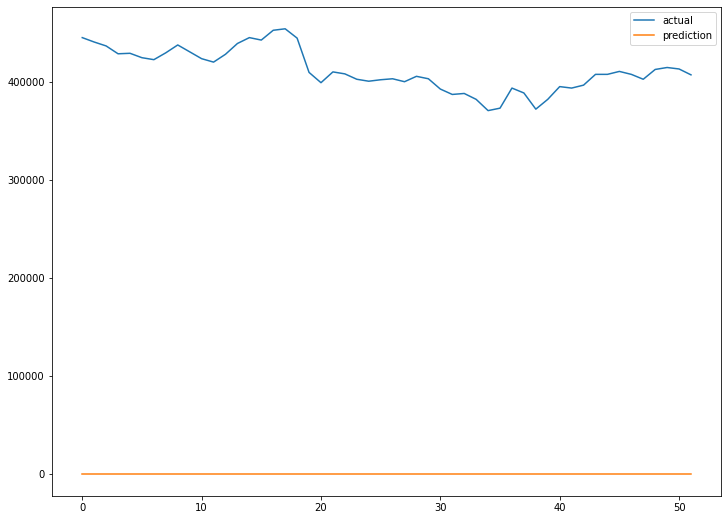

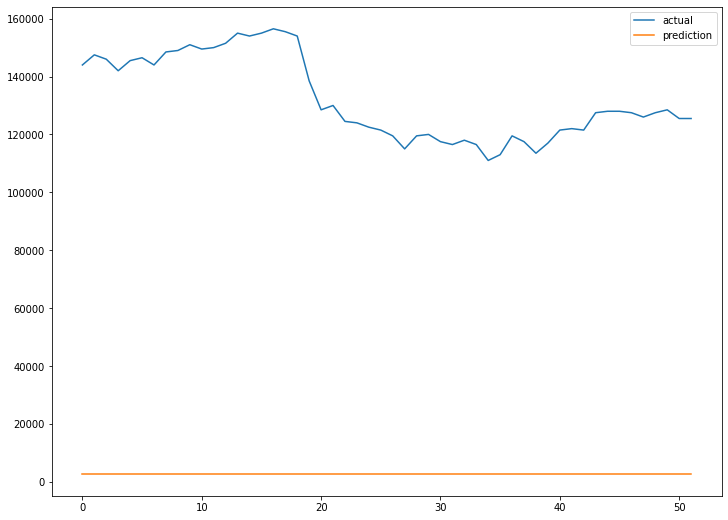

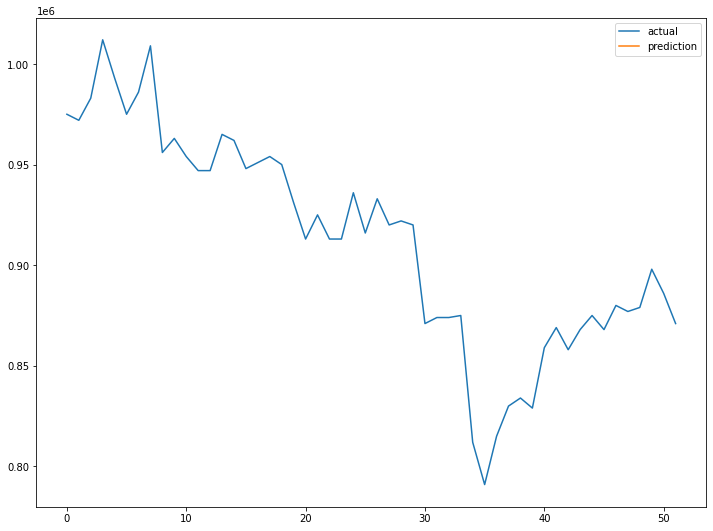

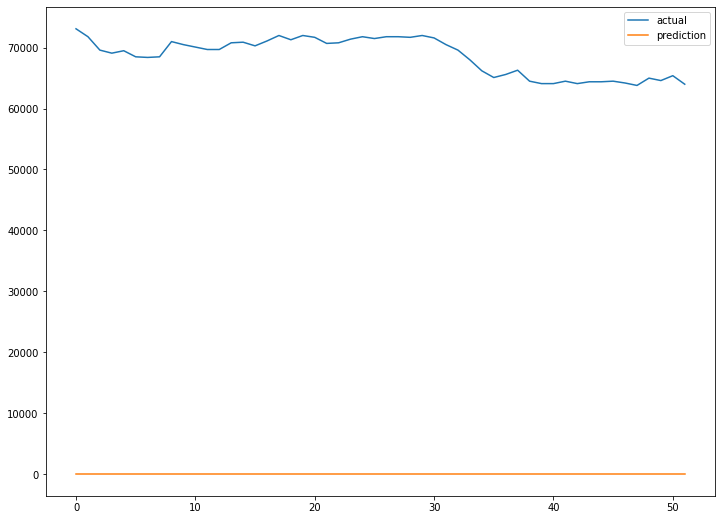

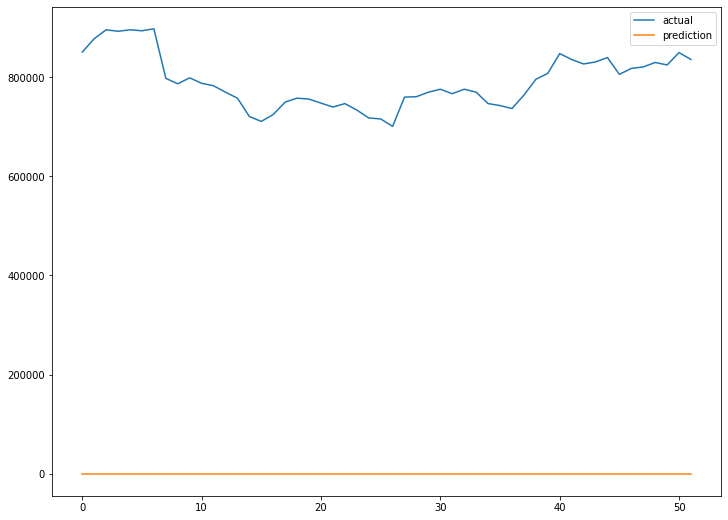

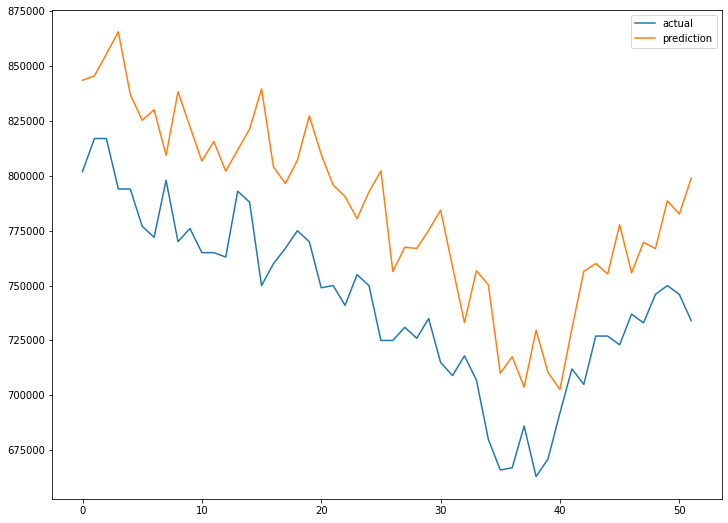

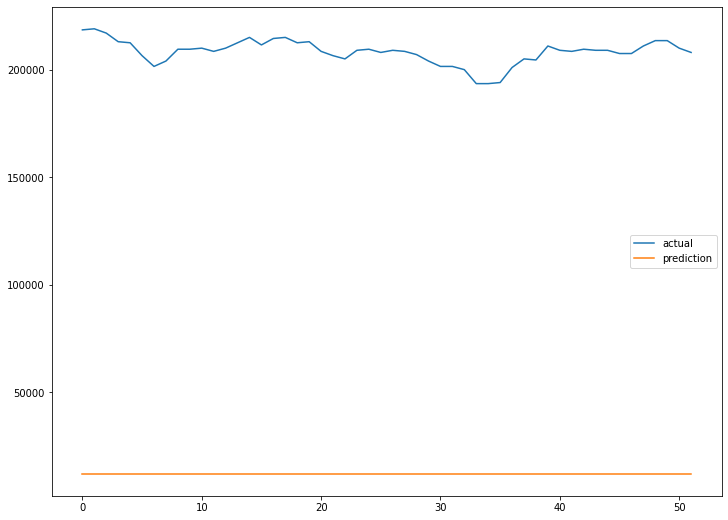

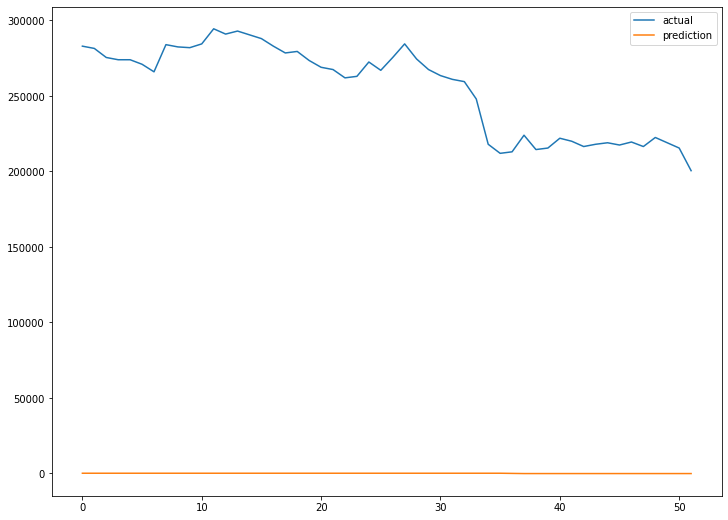

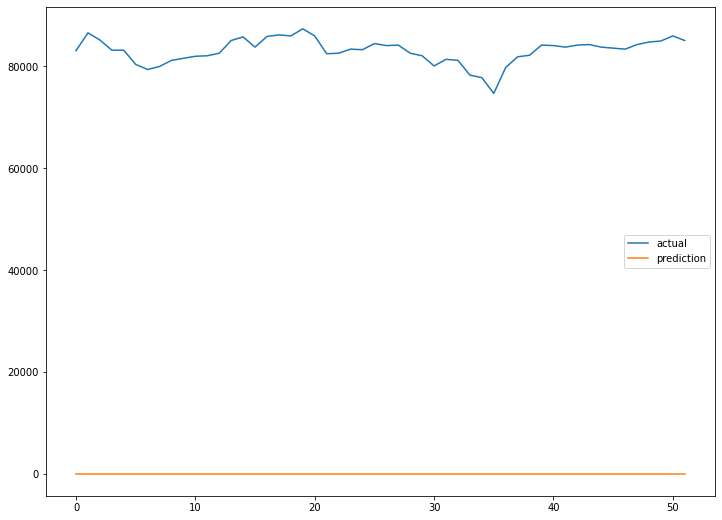

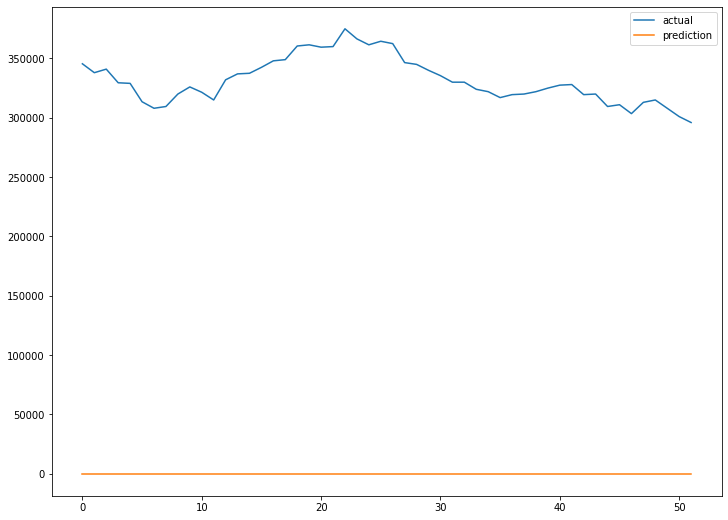

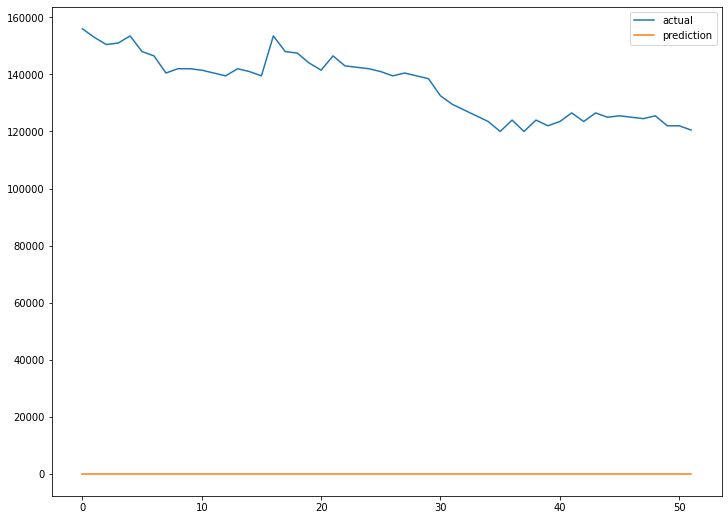

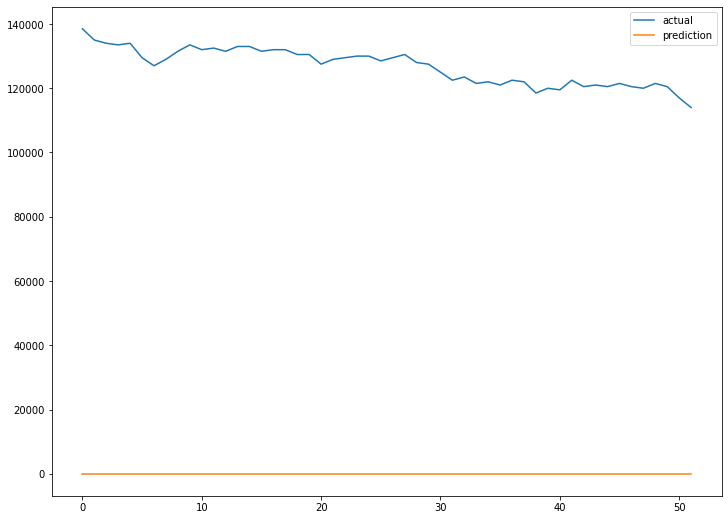

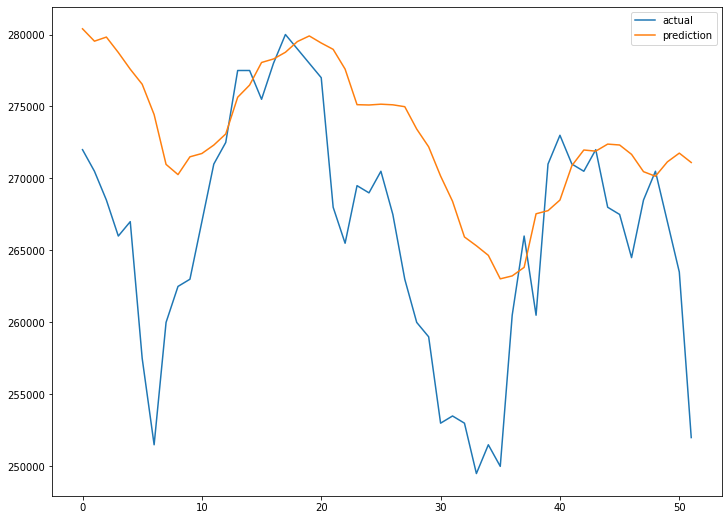

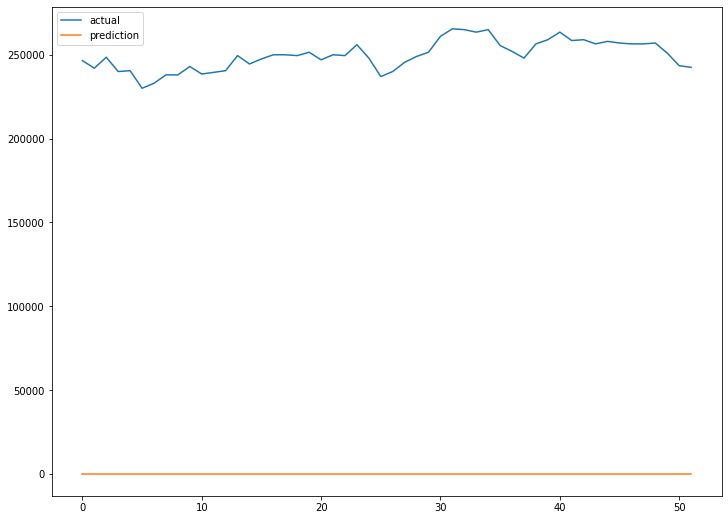

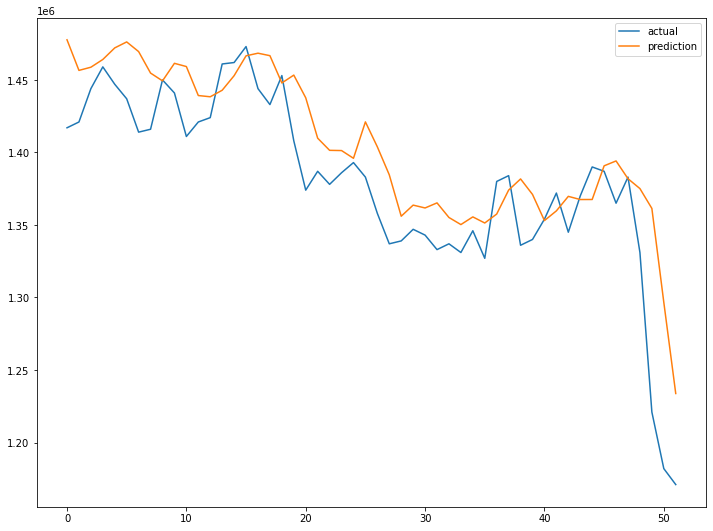

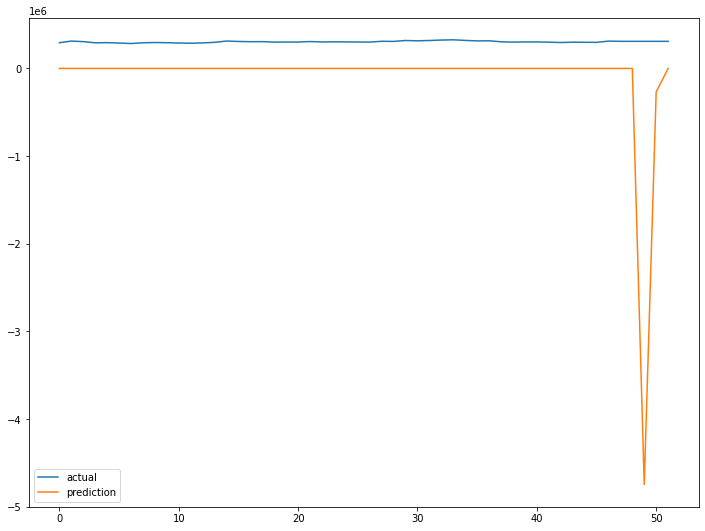

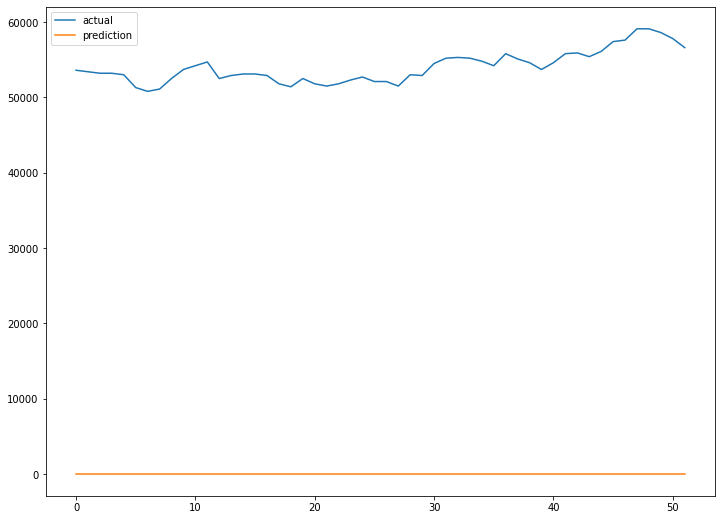

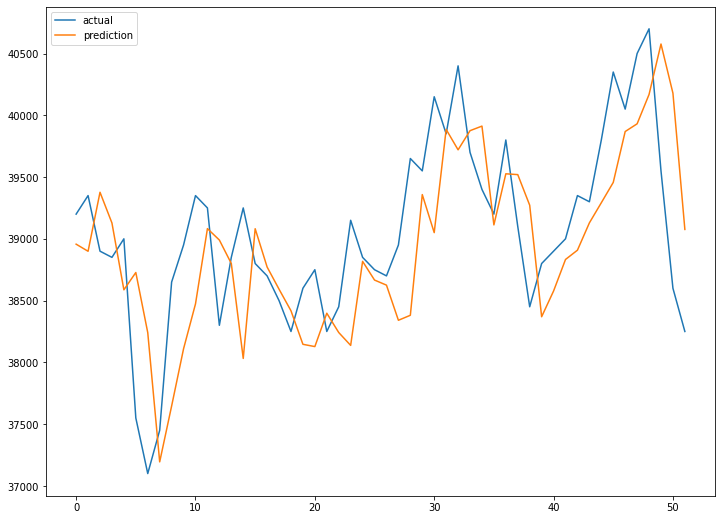

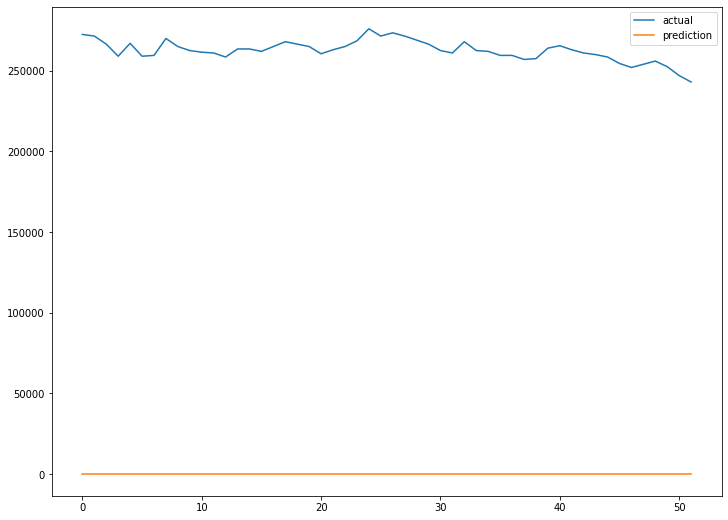

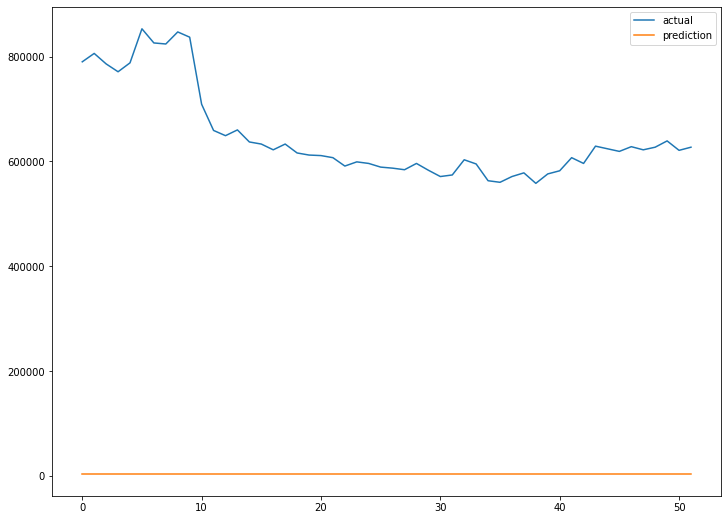

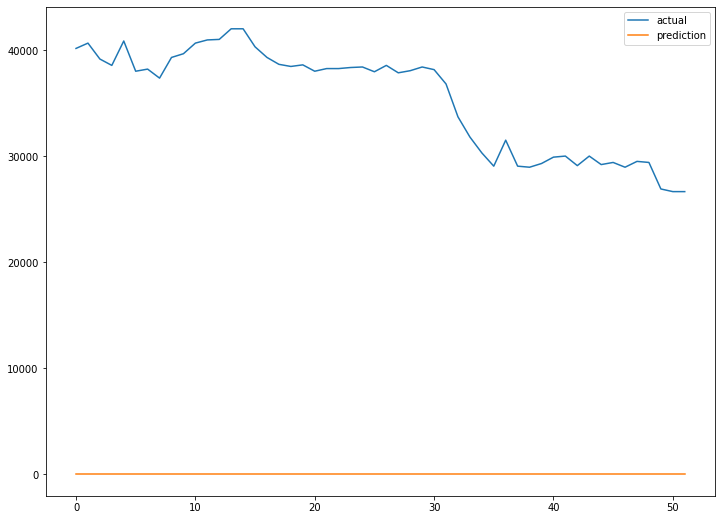

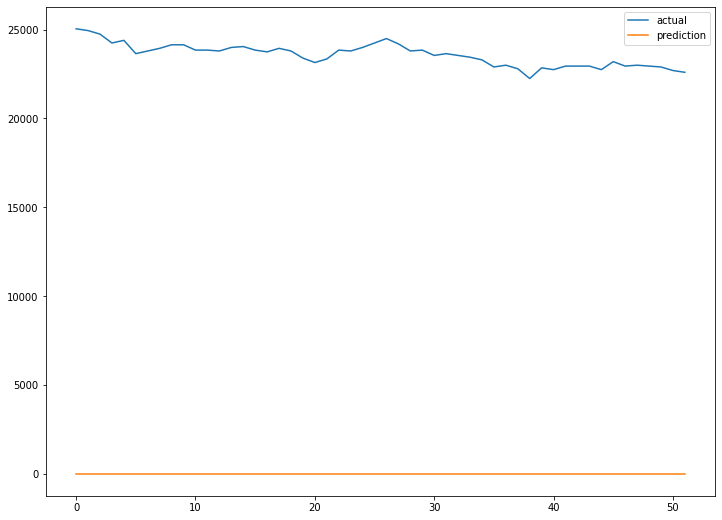

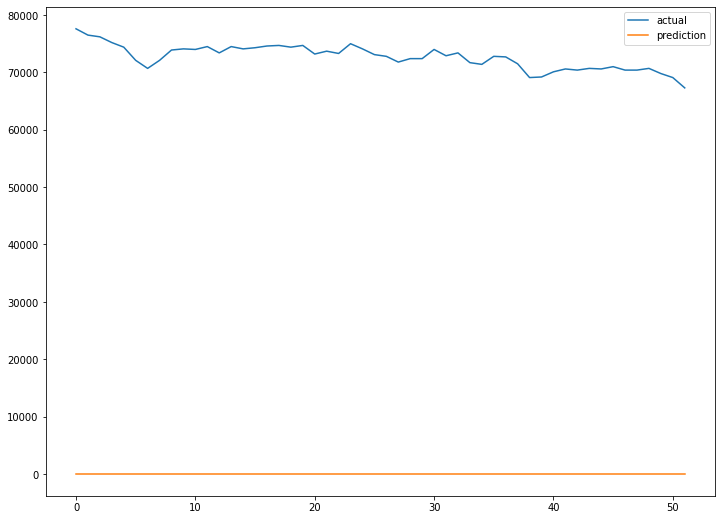

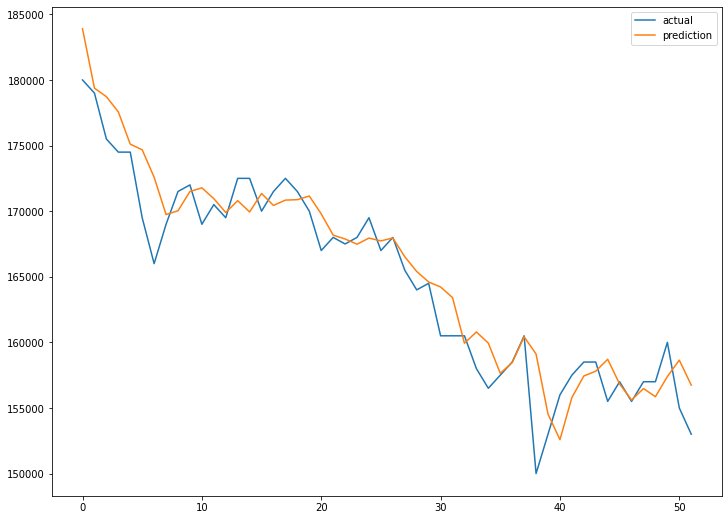

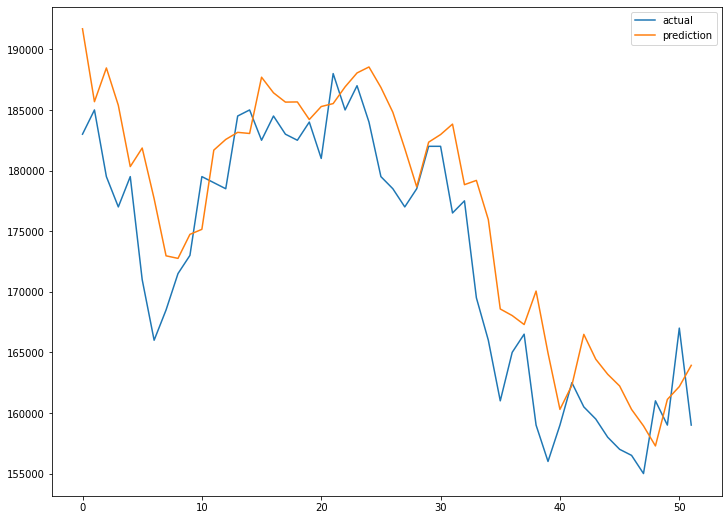

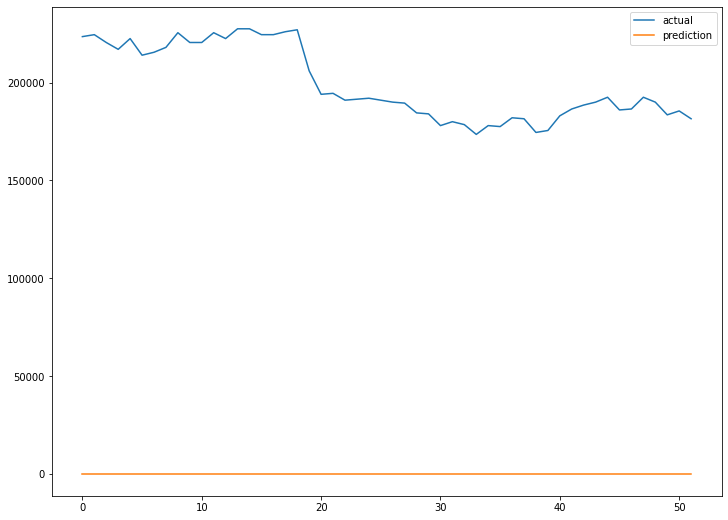

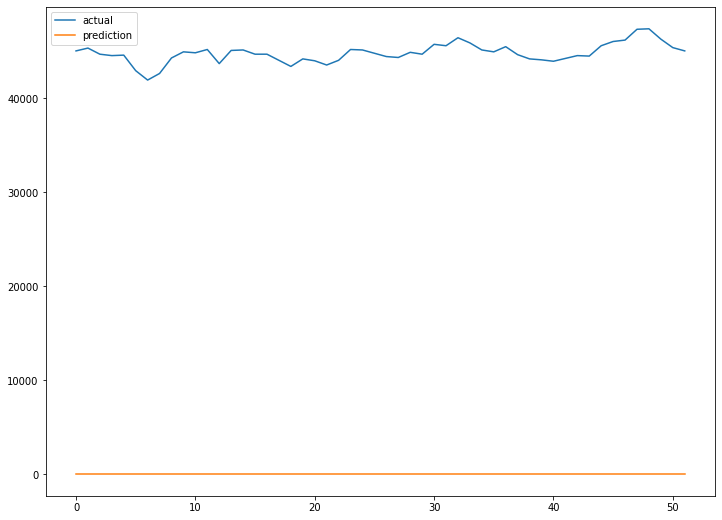

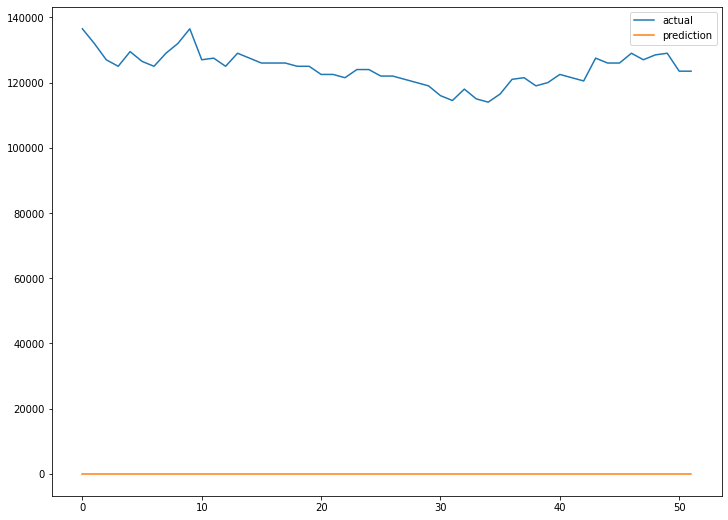

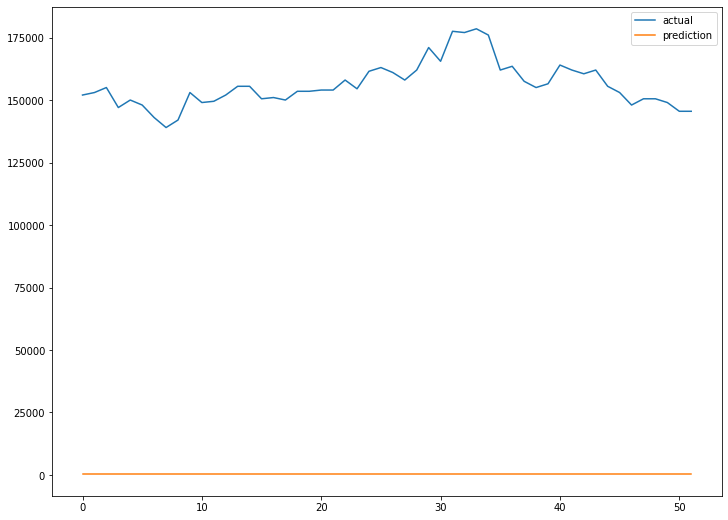

In [33]:
for f_index in range(0, pd_stock_list.shape[0]):
# for f_index in range(0, 10):
  f_code = pd_stock_list.iloc[f_index]['종목코드']
  f_name = pd_stock_list.iloc[f_index]['종목명']
  price_filename = str('price/') + str(f_code) + str('_price.csv')
  if not os.path.exists(price_filename):
    continue
  else:
    pd_price = pd.read_csv(price_filename)
    pd_price['20_SMA'] = pd_price['Close'].rolling(window = 20, min_periods = 1).mean()
    pd_price['50_SMA'] = pd_price['Close'].rolling(window = 50, min_periods = 1).mean()
    pd_price['20_EMA'] = round(pd_price['Close'].ewm(span = 20, adjust = False).mean(), 2)
    pd_price['50_EMA'] = round(pd_price['Close'].ewm(span = 50, adjust = False).mean(), 2)

    feature_cols = ['Open', 'High', 'Low', '20_SMA', '50_EMA', '20_EMA', '50_EMA']
    y_cols = ['Close']

    TEST_SIZE = 350

    train = pd_price[:TEST_SIZE]
    test = pd_price[TEST_SIZE:]

    train_feature = train[feature_cols]
    train_label = train[y_cols]

    # train dataset
    train_feature, train_label = make_dataset(train_feature, train_label, 50)

    # train, validation set 생성
    from sklearn.model_selection import train_test_split
    x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

    print(x_train.shape, x_valid.shape)
    # ((6086, 20, 4), (1522, 20, 4))

    test_feature = test[feature_cols]
    test_label = test[y_cols]

    # test dataset (실제 예측 해볼 데이터)
    test_feature, test_label = make_dataset(test_feature, test_label, 50)

    print(test_feature.shape, test_label.shape)

    model = Sequential()

    model.add(LSTM(5, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
    
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='linear'))

    opt = keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='mean_squared_error', optimizer=opt)

    history = model.fit(x_train, y_train, epochs=100, 
                    batch_size=35, validation_data=(x_valid, y_valid))
    
    save_model_name = str('result/') + str(f_code) + str('_model.h5')
    print('모델 저장 파일 이름 : ', save_model_name)

    model.save(save_model_name)

    pred = model.predict(test_feature)

    plt.figure(figsize=(12, 9))
    plt.plot(test_label, label='actual')
    plt.plot(pred, label='prediction')
    plt.legend()

    save_img_name = str('result/') + str(f_code) + str('_model.png')
    print('그래프 저장 파일 이름 : ', save_img_name)

    plt.savefig(save_img_name)

In [36]:
# Zip the files from given directory that matches the filter
def zipFilesInDir(dirName, zipFileName, filter):
   # create a ZipFile object
   with ZipFile(zipFileName, 'w') as zipObj:
       # Iterate over all the files in directory
       for folderName, subfolders, filenames in os.walk(dirName):
           for filename in filenames:
               if filter(filename):
                   # create complete filepath of file in directory
                   filePath = os.path.join(folderName, filename)
                   # Add file to zip
                   zipObj.write(filePath, basename(filePath))

In [37]:
zipFilesInDir('result', 'model.zip', lambda name : 'h5' in name)

In [38]:
zipFilesInDir('result', 'graph.zip', lambda name : 'png' in name)